In [1]:
import pandas as pd 

In [7]:
customers_df = pd.read_csv("./data/mall_customers.csv")

customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customers_df = customers_df.rename(
    columns={"CustomerID":"customer_id", "Gender":"gender","Age":"age",  
             "Annual Income (k$)":"annual_income", "Spending Score (1-100)":"spending_score"})

customers_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
gender_summary = customers_df.groupby("gender")[["age","annual_income","spending_score"]].mean().reset_index()

gender_summary

,gender,age,annual_income,spending_score
0,Female,38.098214,59.250000,51.526786
1,Male,39.806818,62.227273,48.511364


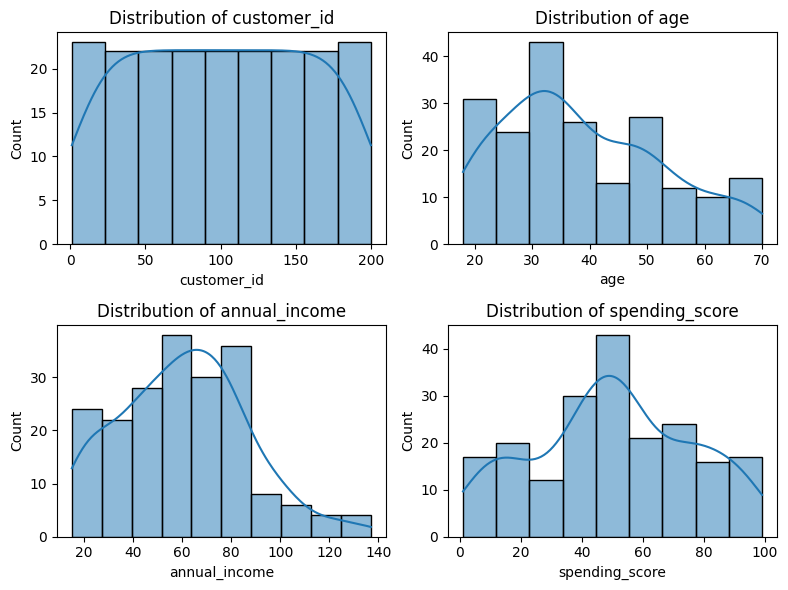

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['customer_id', 'age', 'annual_income', 'spending_score']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))


axes = axes.flatten()


for i, col in enumerate(columns):
    sns.histplot(customers_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

In [20]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)

cluster.fit(customers_df[["annual_income"]])

cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
customers_df["segment"] = cluster.labels_

customers_df.head()

,customer_id,gender,age,annual_income,spending_score,segment
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [23]:
customers_df["segment"].value_counts()

segment
0    104
1     74
2     22
Name: count, dtype: int64

In [27]:
cluster2 = KMeans(n_clusters=5)

cluster2.fit(customers_df[["annual_income", "spending_score"]])

customers_df["spending_income_cluster"] = cluster2.labels_

In [28]:
centers =pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ['x','y']

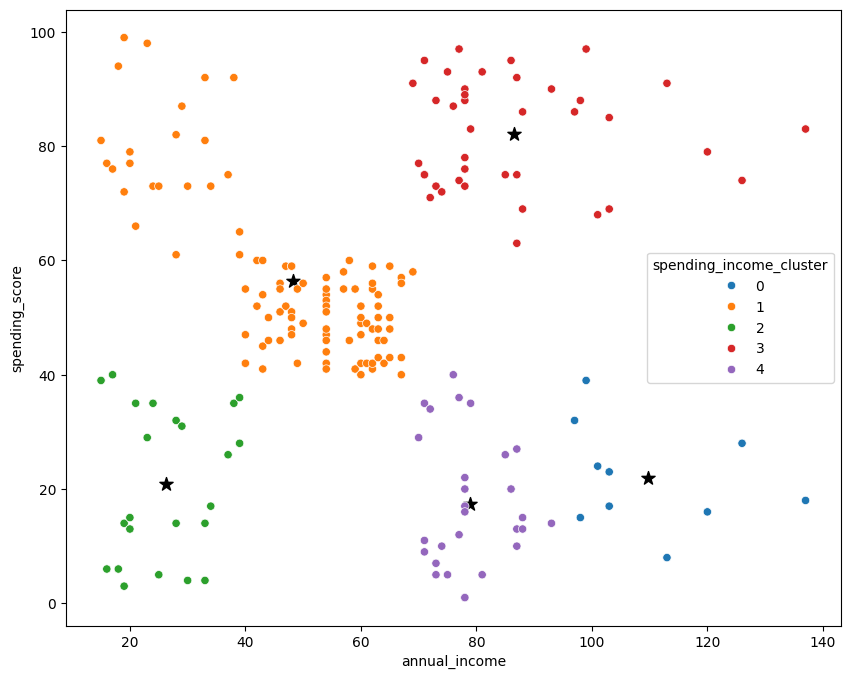

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=customers_df, x ='annual_income',y='spending_score',hue='spending_income_cluster',palette='tab10')
plt.show()